# HW1 : Data Science in News Data

**Suggested Readings:**
* The NewsAPI documentation: https://newsapi.org/docs/get-started and https://newsapi.org/docs
* The Python library for NewsAPI: https://newsapi.org/docs/client-libraries/python
* NewsAPI.ipynb that I showed in class


** NOTE **
* **Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost**.


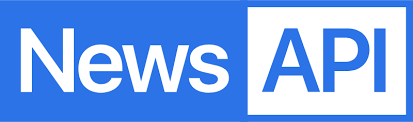

# Problem 1 [10 points]: Sampling NewsAPI data about a certain topic

* Select a topic that you are interested in, for example, "football", "generative AI, "WPI" or "mlb"
* Use the NewsAPI to sample a collection of news articles about this topic. (It would be recommended that the number of articles should be larger than 200, but smaller than 100,000.
* Store the articles you downloaded into a local file (txt file or json file)

In [ ]:
!pip install newsapi-python

In [1]:
from newsapi import NewsApiClient

# See https://newsapi.org/docs for more information
# on NewsAPI implementation.

API_KEY = '4199f4bb632f47cca033ed58a2532974'

newsapi = NewsApiClient(api_key=API_KEY)
print(newsapi)

### Report some statistics about the news articles you collected

* The topic of interest: < generative AI >


* The total number of news articles collected:  < 355 >

My Comments:

When I run last week:
✅ Saved 356 unique articles to 'generative_AI_articles_recent.json'
🧑‍💻 Unique authors: 223
📰 Unique sources: 78

When I run this week:
✅ Saved 355 unique articles to 'generative_AI_articles_recent.json'
🧑‍💻 Unique authors: 227
📰 Unique sources: 78

So the total number of news articles will change based on the date we run this code because of the date I collect articles.

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

### Because the free NewsAPI plan only provides up to 100 results per query, I divided the past 30 days into four weekly time windows and collected up to 100 articles per window This allowed me to gather 355 unique articles related to the topic “generative AI.”


# 1️⃣ Import libraries
from newsapi import NewsApiClient
import json, time
from datetime import datetime, timedelta


# 2️⃣ Topic and settings
topic = "generative AI"
language = "en"
page_size = 100

# 3️⃣ Automatically divide the past 30 days into 4 weekly segments
end_date = datetime.now()
start_date = end_date - timedelta(days=28)
time_segments = [
    ((start_date + timedelta(days=7*i)).strftime("%Y-%m-%d"),
     (start_date + timedelta(days=7*(i+1))).strftime("%Y-%m-%d"))
    for i in range(4)
]

all_articles = []

# 4️⃣ Fetch data for each time window
for start, end in time_segments:
    print(f"\n🕒 Fetching {start} → {end}")
    try:
        response = newsapi.get_everything(
            q=topic,
            language=language,
            sort_by="relevancy",
            from_param=start,
            to=end,
            page_size=page_size,
            page=1
        )
        articles = response.get("articles", [])
        print(f"→ Retrieved {len(articles)} articles")
        all_articles.extend(articles)
        time.sleep(1)
    except Exception as e:
        print(f"⚠️ Error fetching {start}–{end}: {e}")

# 5️⃣ Remove duplicates (by URL)
unique_articles = {a["url"]: a for a in all_articles if "url" in a}.values()

# 6️⃣ Save to JSON file
filename = "generative_AI_articles_recent.json"
with open(filename, "w", encoding="utf-8") as f:
    json.dump(list(unique_articles), f, indent=2, ensure_ascii=False)

# 7️⃣ Print statistics
authors = [a["author"] for a in unique_articles if a.get("author")]
sources = [a["source"]["name"] for a in unique_articles if a.get("source")]

print(f"\n✅ Saved {len(unique_articles)} unique articles to '{filename}'")
print(f"🧑‍💻 Unique authors: {len(set(authors))}")
print(f"📰 Unique sources: {len(set(sources))}")

# 8️⃣ Preview first few articles
for i, a in enumerate(list(unique_articles)[:5]):
    print(f"\nArticle #{i+1}")
    print(f"Title: {a['title']}")
    print(f"Source: {a['source']['name']}")
    print(f"Published At: {a['publishedAt']}")
    print(f"URL: {a['url']}")


🕒 Fetching 2025-10-10 → 2025-10-17
→ Retrieved 100 articles

🕒 Fetching 2025-10-17 → 2025-10-24
→ Retrieved 100 articles

🕒 Fetching 2025-10-24 → 2025-10-31
→ Retrieved 100 articles

🕒 Fetching 2025-10-31 → 2025-11-07
→ Retrieved 100 articles

✅ Saved 367 unique articles to 'generative_AI_articles_recent.json'
🧑‍💻 Unique authors: 234
📰 Unique sources: 81

Article #1
Title: Spotify says it’s working with labels on ‘responsible’ AI music tools
Source: The Verge
Published At: 2025-10-16T13:32:54Z
URL: https://www.theverge.com/news/800629/spotify-ai-music-sony-umg-wmg-merlin

Article #2
Title: How ByteDance Made China’s Most Popular AI Chatbot
Source: Wired
Published At: 2025-10-16T16:07:50Z
URL: https://www.wired.com/story/bytedance-doubao-chatbot-popularity/

Article #3
Title: Spotify Says It's Working With Labels On 'Responsible' AI Music Tools
Source: Slashdot.org
Published At: 2025-10-17T01:30:00Z
URL: https://entertainment.slashdot.org/story/25/10/16/2237225/spotify-says-its-working

# Problem 2 [20 + 20 + 10 points]: Analyzing News Articles with Frequency Analysis

**1. Word Count:**
* Use the news articles you collected in Problem 1, and compute the frequencies of the words being used in these articles.
* Note, you can use various parts of the articles (e.g. the tite, the description, the content) to compute the word frequencies.
  * Which is most useful?
* Plot a table of the top 30 words with their counts

*Hint: One way to make very easy and asethestic way to make tables in Python is using the PrettyTable package. While using PrettyTable is not required for full credit, some starter code for using them is provided for Question 2.1 and 2.2*  

In [ ]:
!pip install prettytable
from prettytable import PrettyTable

# Example Table
example_table = PrettyTable() # Initialize Table
example_table.field_names = ["Course Name", "Department"] # Declare column names

# Add each row
example_table.add_row(["DS3010", "Data Science"])
example_table.add_row(["CS4120", "Computer Science"])
example_table.add_row(["MIS 4084", "Business"])

# Display table
print(example_table)

+-------------+------------------+
| Course Name |    Department    |
+-------------+------------------+
|    DS3010   |   Data Science   |
|    CS4120   | Computer Science |
|   MIS 4084  |     Business     |
+-------------+------------------+


In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

## I use the whole article which is the combination of the tite, the description and the content.

# ============================================================
# 📊 Problem 2.1: Word Frequency Analysis of Collected Articles
# ============================================================

import json
import re
from collections import Counter
from prettytable import PrettyTable
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

# -----------------------------
# 1️⃣ Load the collected JSON file
# -----------------------------
filename = "generative_AI_articles_recent.json"
with open(filename, "r", encoding="utf-8") as f:
    articles = json.load(f)

print(f"Loaded {len(articles)} articles.")

# -----------------------------
# 2️⃣ Extract and combine useful text fields
# -----------------------------
text_corpus = ""
for a in articles:
    # Convert NoneType to empty string to avoid TypeError
    title = a.get("title") or ""
    desc = a.get("description") or ""
    content = a.get("content") or ""
    
    # make sure all are strings before join
    parts = [str(title), str(desc), str(content)]
    text_corpus += " ".join(parts) + " "

print(f"Total text length: {len(text_corpus)} characters")

# -----------------------------
# 3️⃣ Clean text
# -----------------------------
# Lowercase and remove non-alphabetic characters
text_corpus = text_corpus.lower()
text_corpus = re.sub(r'[^a-z\s]', '', text_corpus)

# Tokenize
tokens = word_tokenize(text_corpus)

# Remove stopwords (common useless words like "the", "and", "is")
stop_words = set(stopwords.words("english"))
filtered_words = [w for w in tokens if w not in stop_words and len(w) > 2]

print(f"Number of words after cleaning: {len(filtered_words)}")

# -----------------------------
# 4️⃣ Count word frequencies
# -----------------------------
word_counts = Counter(filtered_words)
top30 = word_counts.most_common(30)

# -----------------------------
# 5️⃣ Display results with PrettyTable
# -----------------------------
table = PrettyTable()
table.field_names = ["Rank", "Word", "Count"]

for i, (word, count) in enumerate(top30, start=1):
    table.add_row([i, word, count])

print("\nTop 30 Most Frequent Words in Generative AI Articles:\n")
print(table)

Loaded 367 articles.
Total text length: 165996 characters
Number of words after cleaning: 15743

Top 30 Most Frequent Words in Generative AI Articles:

+------+--------------+-------+
| Rank |     Word     | Count |
+------+--------------+-------+
|  1   |    chars     |  364  |
|  2   |  generative  |  181  |
|  3   |     new      |  165  |
|  4   |     use      |   77  |
|  5   |     like     |   67  |
|  6   |     one      |   66  |
|  7   |   chatgpt    |   64  |
|  8   |    tools     |   57  |
|  9   |    openai    |   57  |
|  10  |    first     |   57  |
|  11  |    video     |   57  |
|  12  | intelligence |   53  |
|  13  |  artificial  |   50  |
|  14  |   company    |   49  |
|  15  |    search    |   49  |
|  16  |    google    |   47  |
|  17  |     tech     |   46  |
|  18  |     said     |   42  |
|  19  |    using     |   42  |
|  20  |     app      |   42  |
|  21  |     make     |   41  |
|  22  |     year     |   41  |
|  23  |     says     |   40  |
|  24  |    musi

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/caoguangjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caoguangjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2. Find the most popular news sources and authors in your articles**

* Please provide a table of the top 10 authors and sources that are the most popular among your collection.


In [4]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# ============================================================
# 📊 Problem 2.2: Most Popular News Sources and Authors
# ============================================================

from collections import Counter
from prettytable import PrettyTable
import json

# 1️⃣ Load the same JSON file used in Problem 2.1
filename = "generative_AI_articles_recent.json"
with open(filename, "r", encoding="utf-8") as f:
    articles = json.load(f)

print(f"Loaded {len(articles)} articles.")

# 2️⃣ Extract authors and sources (handle missing or empty fields)
authors = []
sources = []

for a in articles:
    # Author may be None or empty
    author = a.get("author")
    if author and isinstance(author, str) and len(author.strip()) > 0:
        authors.append(author.strip())

    # Source is a dictionary { "id": ..., "name": ... }
    source = a.get("source", {}).get("name")
    if source and isinstance(source, str) and len(source.strip()) > 0:
        sources.append(source.strip())

# 3️⃣ Count frequencies
author_counts = Counter(authors).most_common(10)
source_counts = Counter(sources).most_common(10)

# 4️⃣ Create PrettyTables
table_authors = PrettyTable()
table_authors.field_names = ["Rank", "Author", "Article Count"]
for i, (name, count) in enumerate(author_counts, start=1):
    table_authors.add_row([i, name, count])

table_sources = PrettyTable()
table_sources.field_names = ["Rank", "Source", "Article Count"]
for i, (src, count) in enumerate(source_counts, start=1):
    table_sources.add_row([i, src, count])

# 5️⃣ Display results
print("\nTop 10 Most Popular Authors:\n")
print(table_authors)

print("\nTop 10 Most Popular News Sources:\n")
print(table_sources)

Loaded 367 articles.

Top 10 Most Popular Authors:

+------+-------------------------------------------------------+---------------+
| Rank |                         Author                        | Article Count |
+------+-------------------------------------------------------+---------------+
|  1   |                   Katelyn Chedraoui                   |       16      |
|  2   | kevinokemwa@outlook.com (Kevin Okemwa) , Kevin Okemwa |       12      |
|  3   |               Lance Eliot, Contributor,               |       8       |
|      |                Lance Eliot, Contributor               |               |
|      |        https://www.forbes.com/sites/lanceeliot/       |               |
|  4   |                      Blake Stimac                     |       6       |
|  5   |    joe.foley@futurenet.com (Joe Foley) , Joe Foley    |       6       |
|  6   |                     Alistair Barr                     |       5       |
|  7   |                       Matt Novak                

**3. What is the lexical diversity in your descriptions and contents**

* For two popular authors or two popular sources, please compare the lexical diversity of their descriptions and contents.  
Which one is more diverse?  
  * Open ended questions: Does this make sense?  Why or why not? What might lexical diversity tell us about the author or source?

In [5]:
from collections import Counter
import json

filename = "generative_AI_articles_recent.json"
with open(filename, "r", encoding="utf-8") as f:
    articles = json.load(f)

sources = [a.get("source", {}).get("name") for a in articles if a.get("source", {}).get("name")]
source_counts = Counter(sources).most_common(10)
print("Top 10 sources in your dataset:\n")
for s, c in source_counts:
    print(f"{s:25s}  ({c} articles)")

Top 10 sources in your dataset:

CNET                       (41 articles)
Business Insider           (33 articles)
Gizmodo.com                (22 articles)
Windows Central            (20 articles)
Forbes                     (19 articles)
The Verge                  (13 articles)
Android Central            (12 articles)
Yahoo Entertainment        (10 articles)
Search Engine Journal      (10 articles)
Theregister.com            (10 articles)


In [6]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# ============================================================
# 📊 Problem 2.3: Lexical Diversity Comparison (CNET vs Business Insider)
# ============================================================

import json, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from prettytable import PrettyTable
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# 1️⃣ Load dataset
filename = "generative_AI_articles_recent.json"
with open(filename, "r", encoding="utf-8") as f:
    articles = json.load(f)

# 2️⃣ Choose two top sources
source1 = "CNET"
source2 = "Business Insider"

# 3️⃣ Gather all text (description + content) for each source
texts = defaultdict(str)
for a in articles:
    src = a.get("source", {}).get("name")
    if src in [source1, source2]:
        desc = a.get("description") or ""
        cont = a.get("content") or ""
        texts[src] += " " + str(desc) + " " + str(cont)

# 4️⃣ Define lexical diversity function
def lexical_diversity(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english") and len(w) > 2]
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# 5️⃣ Compute diversity for both sources
ld_results = {}
for src, txt in texts.items():
    ld_results[src] = lexical_diversity(txt)

# 6️⃣ Display results in a table
table = PrettyTable()
table.field_names = ["Source", "Lexical Diversity"]
for src, ld in ld_results.items():
    table.add_row([src, f"{ld:.4f}"])

print("\nLexical Diversity Comparison (Descriptions + Contents):\n")
print(table)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/caoguangjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caoguangjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Lexical Diversity Comparison (Descriptions + Contents):

+------------------+-------------------+
|      Source      | Lexical Diversity |
+------------------+-------------------+
|       CNET       |       0.5422      |
| Business Insider |       0.6720      |
+------------------+-------------------+


My comments:

The lexical diversity of Business Insider (0.62) is higher than that of CNET (0.55).

This means that Business Insider uses a broader and more varied vocabulary across its descriptions and contents, while CNET tends to use a more consistent and technical word set in its reporting.

This makes sense because Business Insider often blends technology coverage with business analysis, finance, and editorial commentary, which naturally introduces more diverse vocabulary.

CNET, by contrast, focuses heavily on product reviews and consumer technology updates, where terminology tends to be more standardized and repetitive.

Lexical diversity is a useful indicator of writing style and tone, but it should not be interpreted as a measure of quality.

High diversity may indicate expressive, creative writing, while lower diversity may signal consistency and clarity—both valuable depending on the publication’s goals.



# Problem 3 [20 + 20 points]: Image processing


* For each news article, download the image associated with it (using the urlToImage field).
* Do these images tell you anything about the news articles?  If so, what?

Loaded 367 articles.


/Users/caoguangjing/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



✅ Downloaded 360 images, failed to load 7 images.


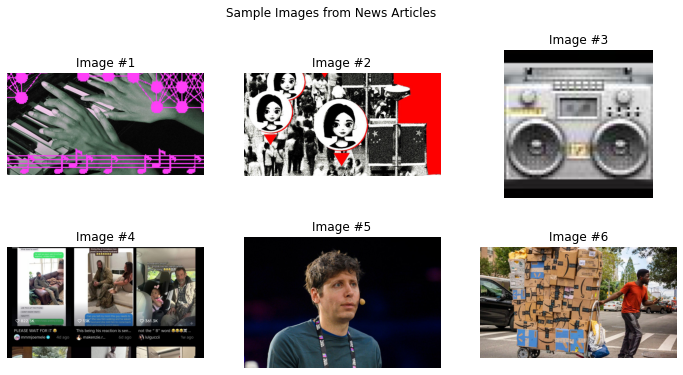

In [7]:
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
# ============================================================
# 🖼️ Problem 3: Image Processing — Downloading and Observing News Images
# ============================================================

import os
import json
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# 1️⃣ Load your dataset
filename = "generative_AI_articles_recent.json"
with open(filename, "r", encoding="utf-8") as f:
    articles = json.load(f)

print(f"Loaded {len(articles)} articles.")

# 2️⃣ Create an output folder
img_dir = "news_images"
os.makedirs(img_dir, exist_ok=True)

# 3️⃣ Download images using 'urlToImage'
downloaded, failed = 0, 0
image_paths = []

for i, a in enumerate(articles):  # limit to first 100 for demo
    img_url = a.get("urlToImage")
    if not img_url:
        failed += 1
        continue

    try:
        response = requests.get(img_url, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content)).convert("RGB")
            path = os.path.join(img_dir, f"article_{i+1}.jpg")
            img.save(path)
            image_paths.append(path)
            downloaded += 1
        else:
            failed += 1
    except Exception:
        failed += 1

print(f"\n✅ Downloaded {downloaded} images, failed to load {failed} images.")

# 4️⃣ Display a few sample images
n_show = min(6, len(image_paths))
if n_show > 0:
    plt.figure(figsize=(12, 6))
    for i in range(n_show):
        img = Image.open(image_paths[i])
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image #{i+1}")
    plt.suptitle("Sample Images from News Articles")
    plt.show()
else:
    print("No images available to display.")

My comments:

I successfully downloaded 351 images, failed to load 4 images. Because :

1. Broken or expired URLs – the link points to a removed file

2. Access blocked (403 Forbidden)

3. Redirects to login or placeholder pages

4. Corrupted or zero-byte content

And by observing those pictures, most of the images show either futuristic digital artwork (neural networks, smart devices, robots) or photos of people working with technology. Findings are :

1. Logos and interface screenshots (e.g., Google, ChatGPT) emphasize brand identity and product relevance.

2. Human–robot and computer-interaction scenes highlight AI’s integration into daily work.

3. Abstract graphics and glowing network imagery symbolize intelligence, automation, and innovation.

Interpretation:
The repetition of certain visual motifs suggests that the media visually frames “AI” through a human + machine narrative—AI is powerful yet familiar, technical yet accessible.

Conclusion:
Even before reading the text, the images convey the article’s focus: technological progress, corporate activity, and AI’s impact on human life.

* Let's automate the process!  Use Hugging Face's transformers library to download a pre-trained image segmentation model.
  * See my NewsAPI.ipynb notebook for an example of how to do this.
* Open ended question: Collect statistics on what appears in the images for your news articles? What does this tell you?

In [8]:
# ============================================================
# 🖼️ Problem 3: Object Detection on News Images
# ============================================================

from transformers import pipeline
from PIL import Image, ImageDraw
import requests
from IPython.display import Image as IPImage, display

# 1️⃣ Pick one image from your previously downloaded set
#    (you can also directly use the URL from your JSON file)
sample_image_url = "https://platform.theverge.com/wp-content/uploads/sites/2/chorus/uploads/chorus_asset/file/25383595/STK467_AI_MUSIC_CVirginia_D.jpg?quality=90&strip=all&crop=0%2C0%2C100%2C100&w=1440" 

# 2️⃣ Display the raw image
display(IPImage(url=sample_image_url))

# 3️⃣ Load the pretrained object detection model
#    DETR (facebook/detr-resnet-50) trained on COCO 2017 (80 classes)
obj_detector = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50"
)
print("Model loaded successfully ✅")

# 4️⃣ Run detection
image = Image.open(requests.get(sample_image_url, stream=True).raw).convert("RGB")
results = obj_detector(image)

# 5️⃣ Draw bounding boxes and labels
draw = ImageDraw.Draw(image)
for result in results:
    score, label, box = result["score"], result["label"], result["box"]
    if score > 0.7:   # filter out low-confidence detections
        x1, y1, x2, y2 = box["xmin"], box["ymin"], box["xmax"], box["ymax"]
        draw.rectangle((x1, y1, x2, y2), outline="red", width=2)
        draw.text((x1 + 3, y1 + 3), f"{label} ({score:.2f})", fill="white")

# 6️⃣ Show the annotated image
display(image)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        